In [1]:
# Import standard libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Import .csv
df = pd.read_csv("csv/AirQualityUCI.csv", delimiter= ";")

In [3]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [4]:
# Change all ',' to '.' to represent US data standard
df['CO(GT)'] = df['CO(GT)'].str.replace(',', '.')
df['CO(GT)'] = pd.to_numeric(df['CO(GT)'])

df['C6H6(GT)'] = df['C6H6(GT)'].str.replace(',', '.')
df['C6H6(GT)'] = pd.to_numeric(df['C6H6(GT)'])

df['T'] = df['T'].str.replace(',', '.')
df['T'] = pd.to_numeric(df['T'])

df['RH'] = df['RH'].str.replace(',', '.')
df['RH'] = pd.to_numeric(df['RH'])

df['AH'] = df['AH'].str.replace(',', '.')
df['AH'] = pd.to_numeric(df['AH'])

df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [5]:
# Drop unncessessary columns for my portion of the project
df_nick = df.drop(columns=['Unnamed: 15', 'Unnamed: 16', 'C6H6(GT)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)'])
df_nick.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,1046.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,955.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,939.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,948.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,836.0,11.2,59.6,0.7888


In [6]:
# Combine Date time
df_nick["Time"] = df_nick["Time"].str.replace(".", ":", regex=False)
df_nick["Datetime"] = pd.to_datetime(df_nick["Date"] + " " + df_nick["Time"], dayfirst=True)
df_nick = df_nick.set_index("Datetime").sort_index()
df_nick.drop(columns=["Date", "Time"], inplace=True)

df_nick.head()

,CO(GT),PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),T,RH,AH
Datetime,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,1046.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,112.0,955.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,88.0,939.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,80.0,948.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,51.0,836.0,11.2,59.6,0.7888


<Axes: >

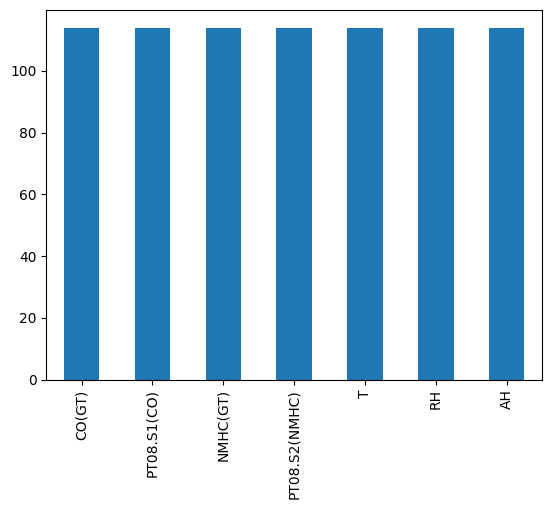

In [7]:
# Check how clean data is
df_nick.isna().sum().plot.bar()

In [8]:
# Clearly there is an actual chunk that is missing from each column

array([<Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>,
       <Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>,
       <Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>,
       <Axes: xlabel='Datetime'>], dtype=object)

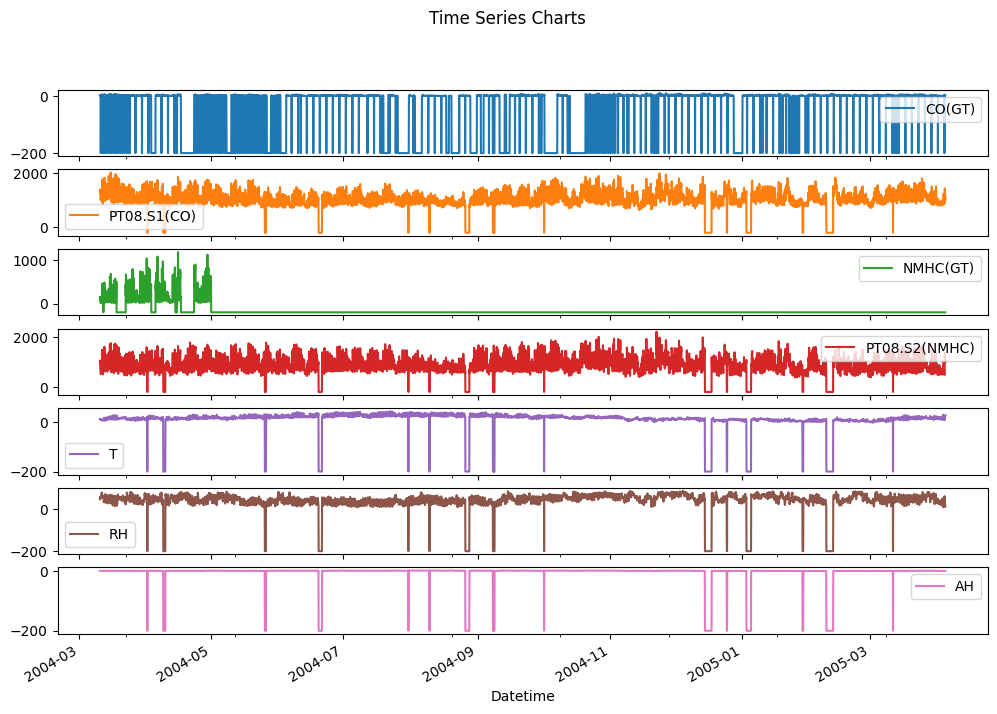

In [9]:
vars_to_plot = [
    "CO(GT)",
    "PT08.S1(CO)",
    "NMHC(GT)",
    "PT08.S2(NMHC)",
    "T",
    "RH",
    "AH"
]

df_nick[vars_to_plot].plot(
    subplots=True,
    figsize=(12, 8),
    title="Time Series Charts"
)

array([<Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>,
       <Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>,
       <Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>,
       <Axes: xlabel='Datetime'>], dtype=object)

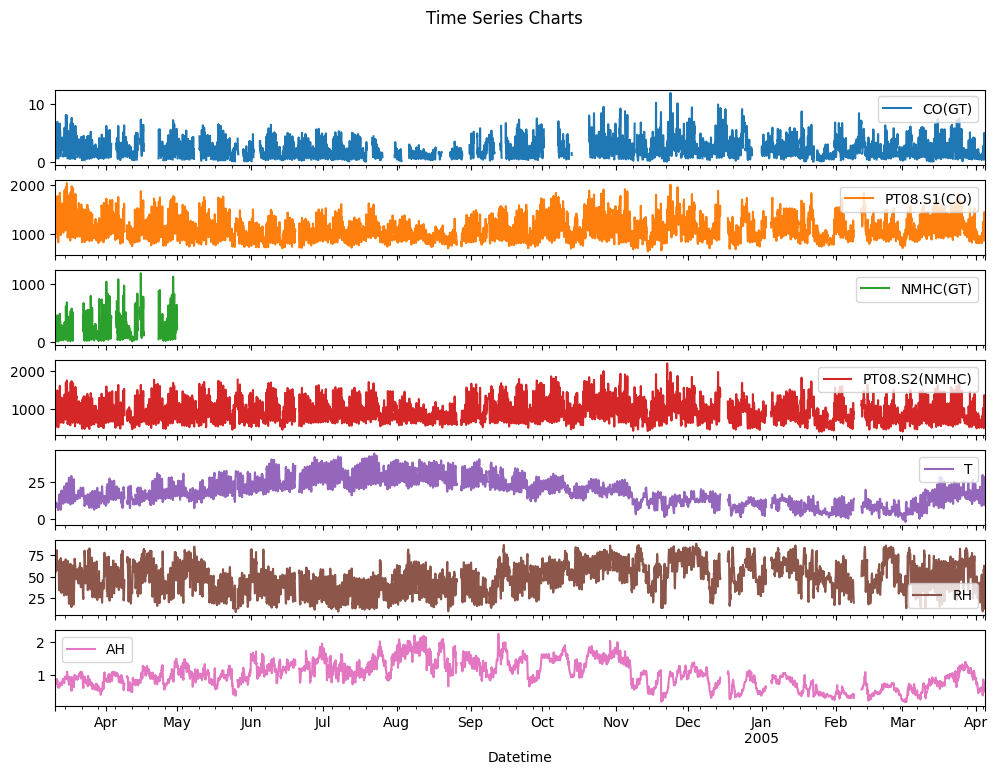

In [10]:
# What is to be expected are all "NaN" areas should be in the same timestamps

# What is interesting is the -200 values. We can consider that as NaN as well
df_nick.replace(-200, np.nan, inplace=True)
df_nick = df_nick[~df_nick.index.isna()]

df_nick[vars_to_plot].plot(
    subplots=True,
    figsize=(12, 8),
    title="Time Series Charts"
)

# What is even more interesting that NMHC(GT) data completely falls off around 2004-05 (year-month)

In [11]:
# Separating the data (Sensor/GT)
df_sensors = df_nick.drop(columns=['CO(GT)', 'NMHC(GT)'])
df_gt = df_nick.drop(columns=['PT08.S1(CO)', 'PT08.S2(NMHC)'])

In [12]:
# Save cleaned data as CSV for later use
# df_clean.to_csv('csv/AirQualityUCI_clean.csv')
# df_gt.to_csv('csv/GT.csv')
# df_sensors.to_csv('csv/sensors.csv')

array([<Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>], dtype=object)

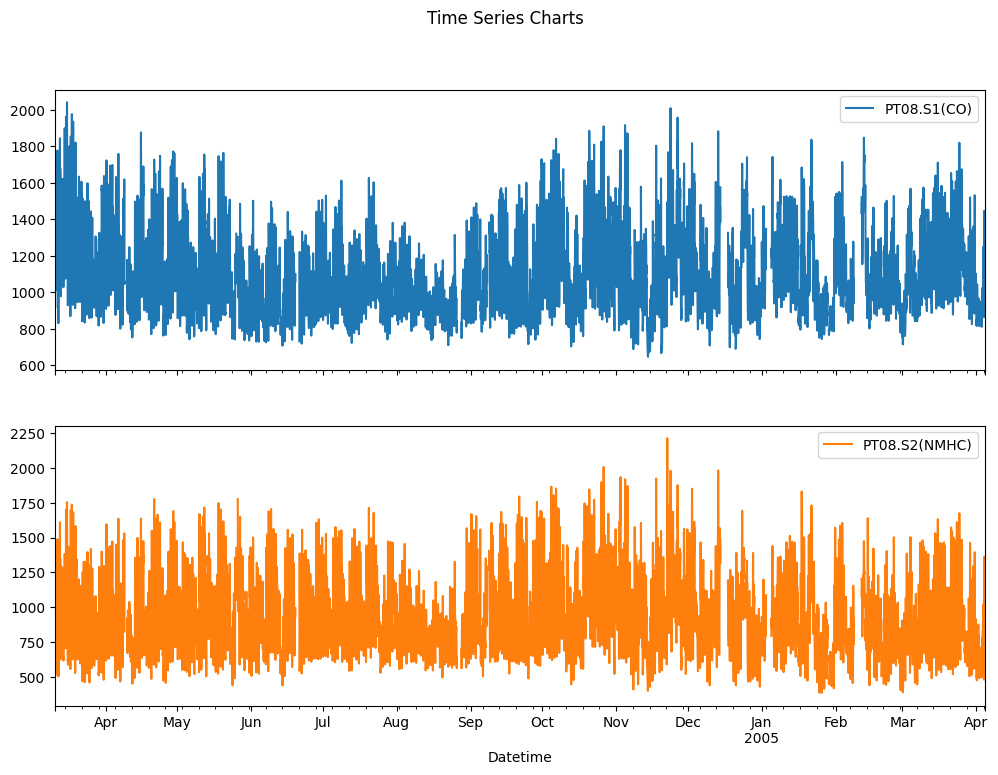

In [13]:
vars_to_plot = [
    "PT08.S1(CO)",
    "PT08.S2(NMHC)"
]

df_sensors[vars_to_plot].plot(
    subplots=True,
    figsize=(12, 8),
    title="Time Series Charts"
)

array([<Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>], dtype=object)

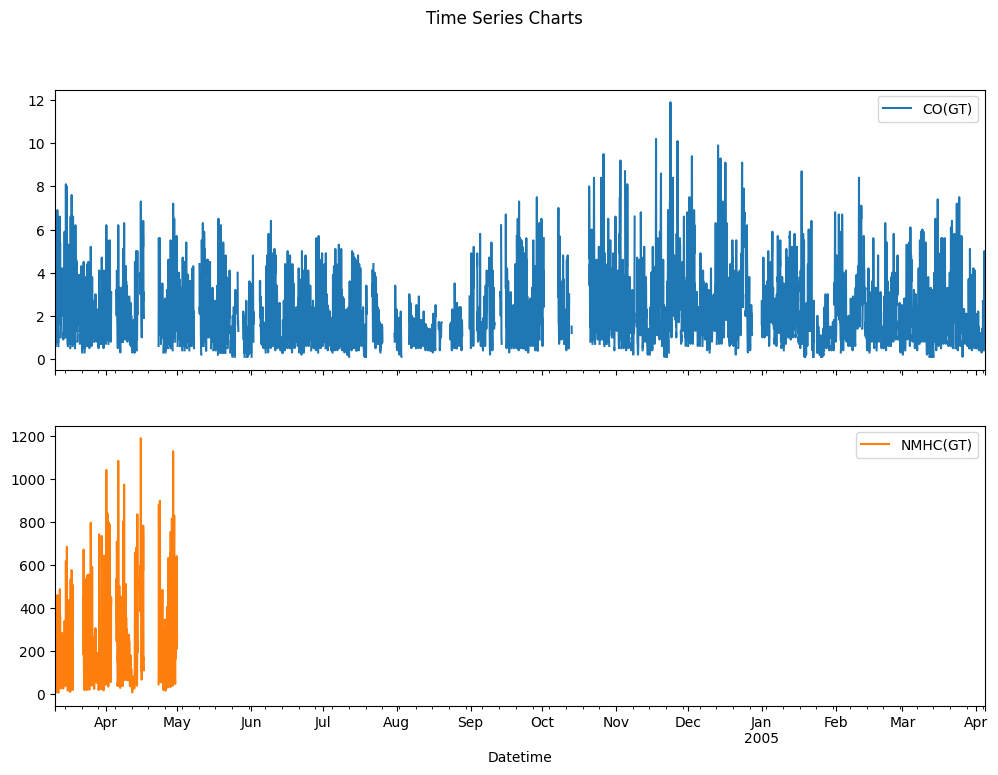

In [14]:
vars_to_plot = [
    "CO(GT)",
    "NMHC(GT)"
]

df_gt[vars_to_plot].plot(
    subplots=True,
    figsize=(12, 8),
    title="Time Series Charts"
)

In [15]:
# Because of the missing data for NMHC (GT), synthetic data must be made to make up for the data loss.
# Therefore existing GT data was used to impute data
# Before anything, more cleaning must be done

In [16]:
target = "NMHC(GT)"

print("Rows:", len(df_nick))
print("NaNs in target:", df_nick[target].isna().sum())
print("Count of -200 in target:", (df_nick[target] == -200).sum()) # sanity check
print("Target dtype:", df_nick[target].dtype)


Rows: 9357
NaNs in target: 8443
Count of -200 in target: 0
Target dtype: float64


<Axes: title={'center': 'NMHC(GT)'}, xlabel='Datetime'>

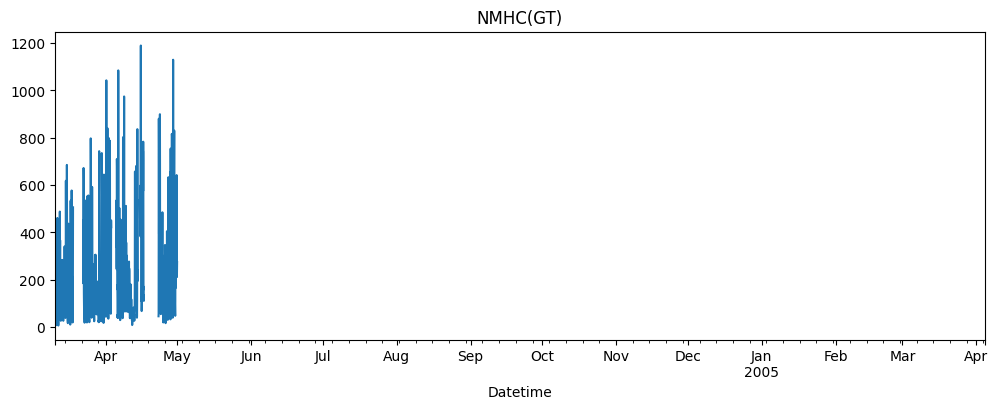

In [17]:
df_nick[target].plot(figsize=(12,4), title="NMHC(GT)")


In [18]:
# count NaNs per column
print("NaNs per column:\n", df_nick.isna().sum().sort_values(ascending=False).head(20))

# count -200 per column (if any)
print("\n-200 per column:\n", (df_nick == -200).sum().sort_values(ascending=False).head(20))


NaNs per column:
 NMHC(GT)         8443
CO(GT)           1683
PT08.S1(CO)       366
PT08.S2(NMHC)     366
T                 366
RH                366
AH                366
dtype: int64

-200 per column:
 CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
PT08.S2(NMHC)    0
T                0
RH               0
AH               0
dtype: int64


In [19]:
# create training data from existing data
target = "NMHC(GT)"

train = df_nick[df_nick[target].notna()]
missing = df_nick[df_nick[target].isna()]

In [20]:
# sanity check
print(type(df_nick.index))

# add time features
df_nick["hour"] = df_nick.index.hour
df_nick["dayofweek"] = df_nick.index.dayofweek
df_nick["month"] = df_nick.index.month

df_nick[["hour", "dayofweek", "month"]].head()

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


,hour,dayofweek,month
Datetime,,,
2004-03-10 18:00:00,18,2,3
2004-03-10 19:00:00,19,2,3
2004-03-10 20:00:00,20,2,3
2004-03-10 21:00:00,21,2,3
2004-03-10 22:00:00,22,2,3


In [21]:
# Since interpolation didnt work well with large data gaps, conditions will be put in place
# if gaps are <= 500, interpolation will be the method of choice to fill in missing data
# else, use model based imputation via randomforest

from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

num_cols = [c for c in df_nick.columns if c not in ["hour","dayofweek","month"]]

na_counts = df_nick[num_cols].isna().sum().sort_values(ascending=False)

for target in na_counts[na_counts > 0].index:
    n_missing = int(na_counts[target])

    # interpolation
    if n_missing <= 500:
        df_nick[target] = df_nick[target].interpolate(method="time").ffill().bfill()
        print(f"{target}: interpolated ({n_missing} missing)")
        continue

    # model-based
    train = df_nick[df_nick[target].notna()]
    missing = df_nick[df_nick[target].isna()]

    X_train = train.drop(columns=[target])
    y_train = train[target]
    X_missing = missing.drop(columns=[target])

    model = Pipeline([
        ("imp", SimpleImputer(strategy="median")),
        ("rf", RandomForestRegressor(
            n_estimators=600,
            max_depth=16,
            min_samples_leaf=2,
            random_state=0,
            n_jobs=-1
        ))
    ])

    model.fit(X_train, y_train)
    df_nick.loc[missing.index, target] = model.predict(X_missing)
    
    # Prints which columns are being filled
    print(f"{target}: impute-baby! ({n_missing} missing)")

NMHC(GT): impute-baby! (8443 missing)
CO(GT): impute-baby! (1683 missing)
PT08.S1(CO): interpolated (366 missing)
PT08.S2(NMHC): interpolated (366 missing)
T: interpolated (366 missing)
RH: interpolated (366 missing)
AH: interpolated (366 missing)


array([<Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>,
       <Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>,
       <Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>,
       <Axes: xlabel='Datetime'>], dtype=object)

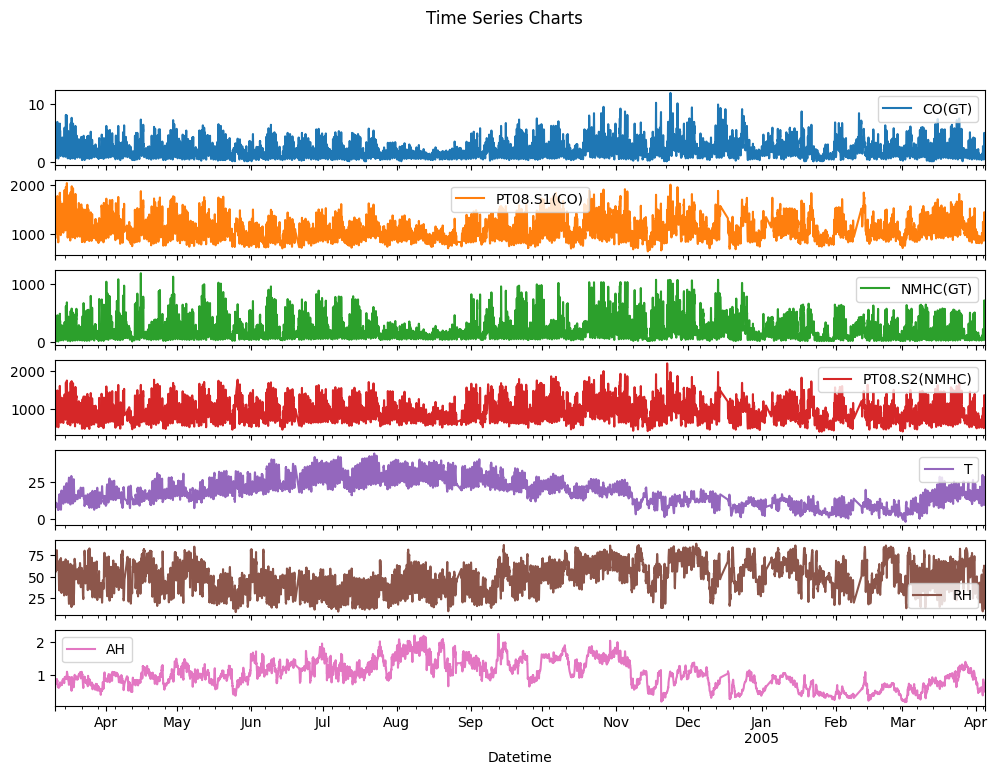

In [22]:
# check how it looks after interpolation and imputation
vars_to_plot = [
    "CO(GT)",
    "PT08.S1(CO)",
    "NMHC(GT)",
    "PT08.S2(NMHC)",
    "T",
    "RH",
    "AH"
]

df_nick[vars_to_plot].plot(
    subplots=True,
    figsize=(12, 8),
    title="Time Series Charts"
)

In [23]:
# Separating the data again but with better data
df_sensors = df_nick.drop(columns=['CO(GT)', 'NMHC(GT)'])
df_gt = df_nick.drop(columns=['PT08.S1(CO)', 'PT08.S2(NMHC)'])

In [24]:
# Save cleaned data as CSV

df_nick.to_csv("csv/AirQualityFinal.csv") # Cleaned dataset with time features
df_gt.to_csv('csv/GT.csv') # GT data
df_sensors.to_csv('csv/sensors.csv') # sensor data